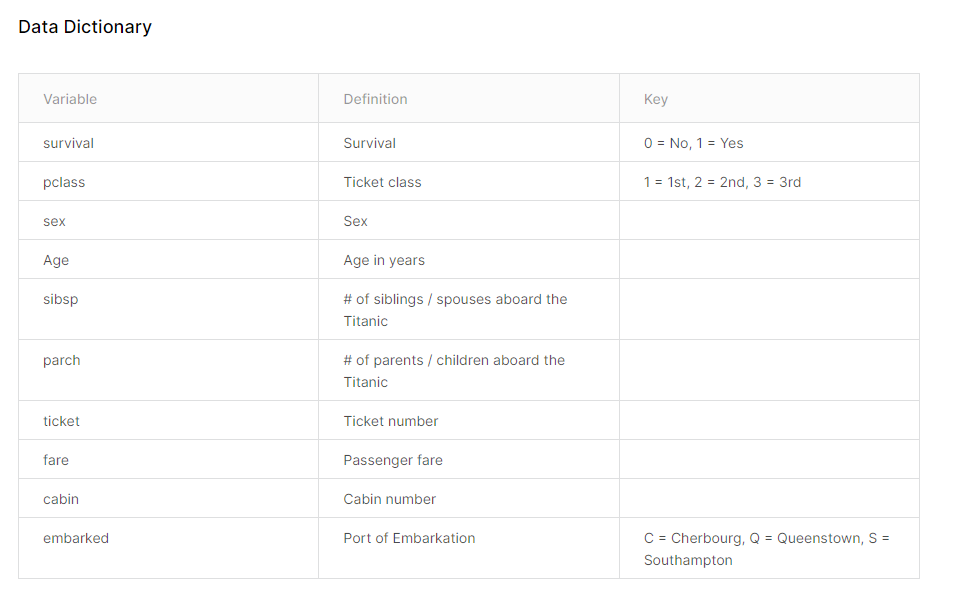

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 0. Functions

In [3]:
# how many missing values in train
def show_missing(column):
    print('Column name: ',column)
    print('Number of values: {}'.format(train[column].count()))
    print('Number of missing values: {}'.format(train.shape[0] - train[column].count()))

# 1. Downloading and exploring data

In [4]:
train = pd.read_csv(r'data\train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# columns with gaps
empty_columns_train = train.columns[[ind for ind,x in enumerate(train.isnull().any()) if x]]

In [9]:
count_empty_columns_train = np.sum(train[empty_columns_train].isnull())

(array([0, 1, 2]),
 [Text(0, 0, 'Age'), Text(1, 0, 'Cabin'), Text(2, 0, 'Embarked')])

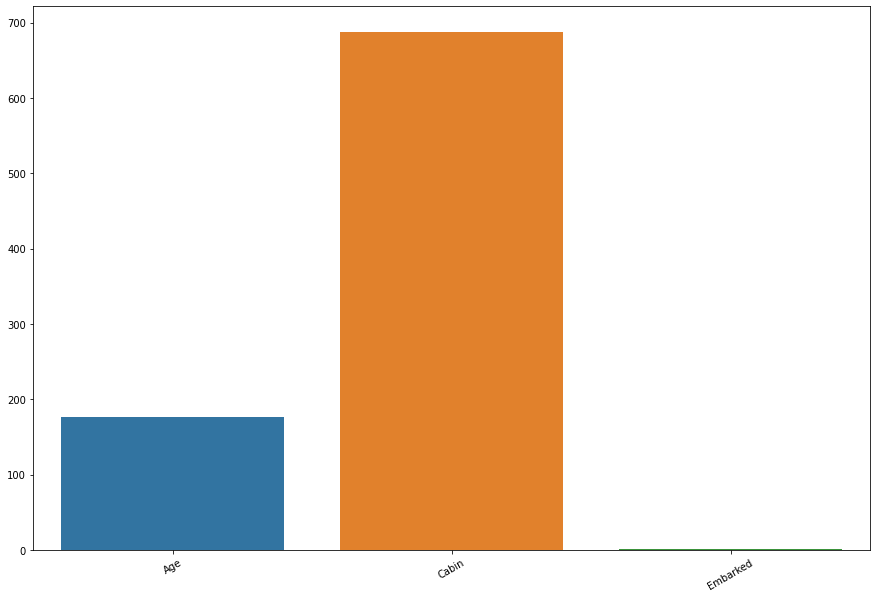

In [10]:
plt.figure(figsize=(15,10))
ploting = sns.barplot(x = empty_columns_train, y=count_empty_columns_train.values)
plt.xticks(rotation=30)

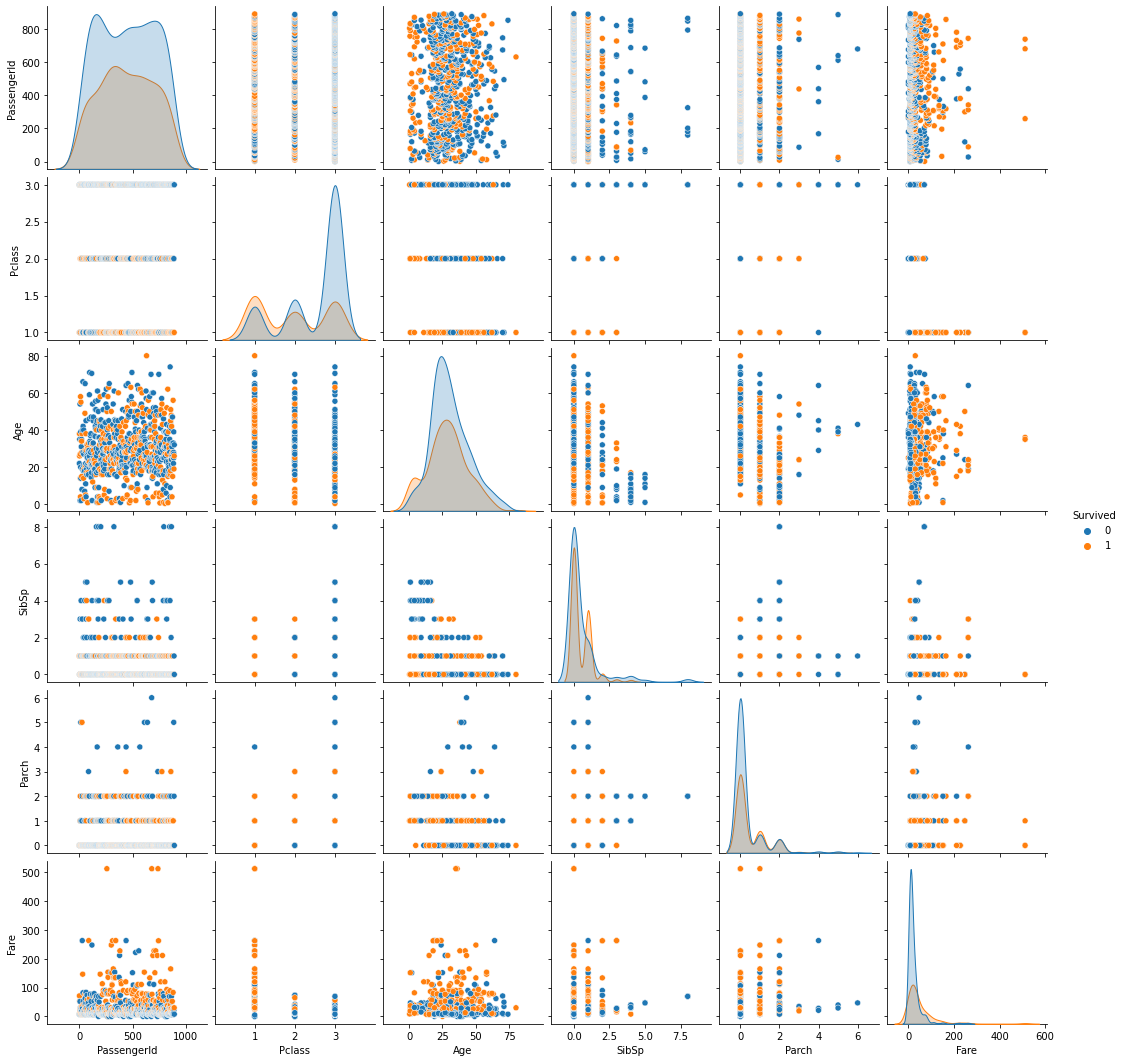

In [11]:
sns.pairplot(train, hue = 'Survived')

+ The presented features are very mixed and it will be difficult to use them for the model

In [12]:
test = pd.read_csv(r'data\test.csv')

In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
test.shape

(418, 11)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
empty_columns_test = test.columns[[ind for ind,x in enumerate(test.isnull().any()) if x]]

In [17]:
count_empty_columns_test = np.sum(test[empty_columns_test].isnull())

(array([0, 1, 2]),
 [Text(0, 0, 'Age'), Text(1, 0, 'Fare'), Text(2, 0, 'Cabin')])

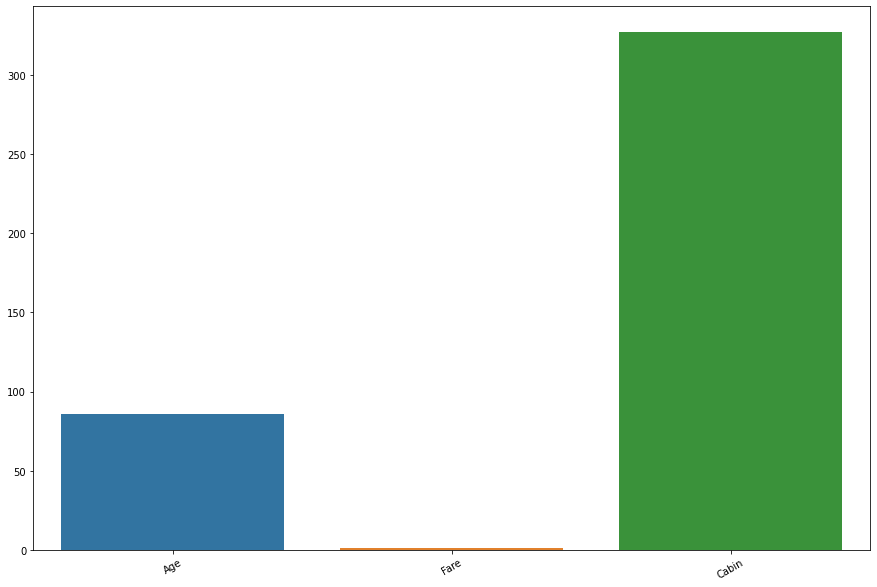

In [18]:
plt.figure(figsize=(15,10))
ploting = sns.barplot(x = empty_columns_test, y = count_empty_columns_test.values)
plt.xticks(rotation=30)

In [19]:
y_train = train[['Survived']] # Labels
X_train_num = train.select_dtypes(include=np.number) # Numerical data
X_train_num = X_train_num.drop('Survived',axis = 1)
X_train_cat = train.select_dtypes(exclude=np.number) # Categories data

## 1.1 Numerical features

In [20]:
X_train_num.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


+ There are missing only in Age

<AxesSubplot:>

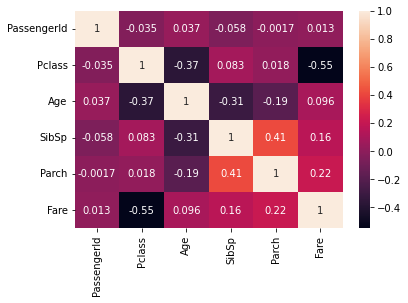

In [21]:
sns.heatmap(X_train_num.corr(), annot=True)

+ There are no highly correlated features

## 1.2 Categorical features

In [22]:
X_train_cat.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


+ Many values are missing in the Cabin feature. Most likely it should be excluded.
+ The Embedded attribute is missing 2 values.Will exclude rows with a missing value, or declare the omission as another attribute value.

## 1.3 Class balance (Survived)

Based on the logical meaning of the task, just let's see. We will not perform balancing.

Survived
0           61.616162
1           38.383838
dtype: float64

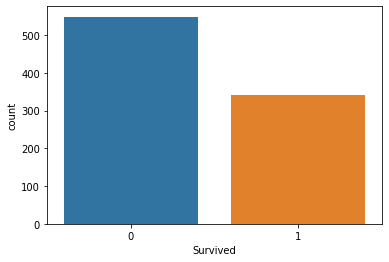

In [23]:
sns.countplot(x='Survived', data=y_train)

y_train.value_counts(normalize=True)*100

# 2. Data analysis of missing values

## 2.1 Numerical feature in groups

In [24]:
X_train_num.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


The attribute will not be considered:
+ PassangerId -it can not affect the target attribute, it will be useful only for predicting.

### 2.1.1 Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

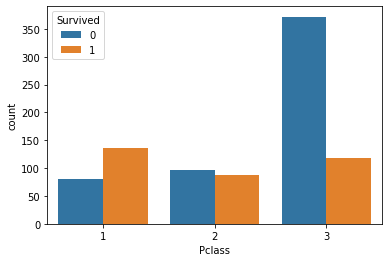

In [25]:
sns.countplot(x='Pclass',hue='Survived', data=train)

In [26]:
show_missing('Pclass')

Column name:  Pclass
Number of values: 891
Number of missing values: 0


+ As expected, the 1st class is more likely to survive, while the 3rd has a significantly lower probability.
+ There are no missing values.

### 2.1.2 Age

Text(0.5, 1.0, 'Survived distibution')

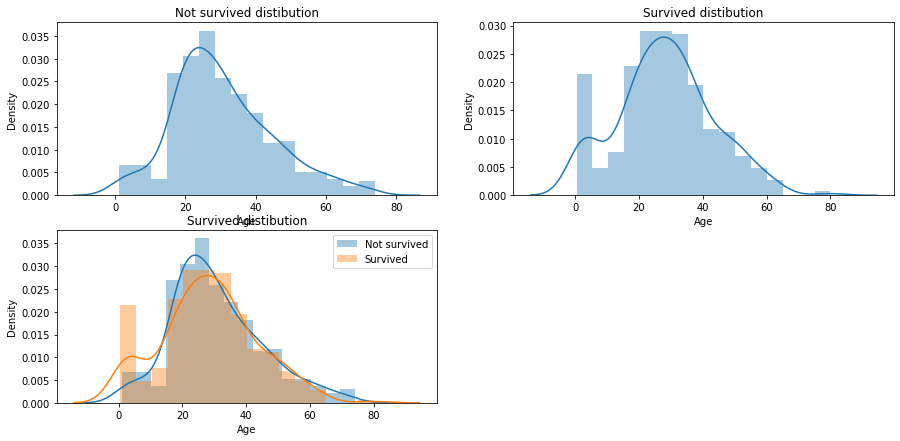

In [27]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(train[train['Survived']==0]['Age'])
plt.title('Not survived distibution')

plt.subplot(2,2,2)
sns.distplot(train[train['Survived']==1]['Age'])
plt.title('Survived distibution')

plt.subplot(2,2,3)
sns.distplot(train[train['Survived']==0]['Age'], label ='Not survived')
sns.distplot(train[train['Survived']==1]['Age'], label ='Survived')
plt.legend()
plt.title('Survived distibution')

In [28]:
show_missing('Age')

Column name:  Age
Number of values: 714
Number of missing values: 177


+ Since the distributions have a different form and may belong to different distribution families, this feature should be left.
+ The missing 177 values.

### 2.1.3 SibSp

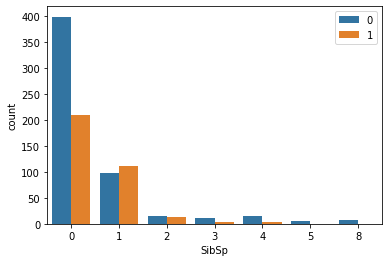

In [29]:
sns.countplot(x='SibSp',hue='Survived', data=train)
plt.legend(loc='upper right')

In [30]:
show_missing('SibSp')

Column name:  SibSp
Number of values: 891
Number of missing values: 0


+ There are no missing values.

### 2.1.4 Parch

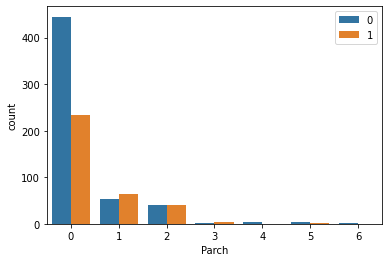

In [31]:
sns.countplot(x='Parch',hue='Survived', data=train)
plt.legend(loc='upper right')

In [32]:
show_missing('Parch')

Column name:  Parch
Number of values: 891
Number of missing values: 0


The number of family members affects the target attribute. In the future, it is worth combining SibSp and Parch into one attribute and breaking it into groups:
1. has big family(3+)
1. has family(1-3)
1. no family(0)

### 2.1.5 Fare

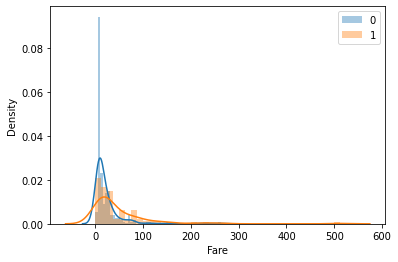

In [33]:
sns.distplot(train[train['Survived'] == 0]['Fare'], label=0)
sns.distplot(train[train['Survived'] == 1]['Fare'], label=1)
plt.legend()

In [34]:
show_missing('Fare')

Column name:  Fare
Number of values: 891
Number of missing values: 0


+ There are no missing values.

## 2.2 Categorical features

In [35]:
X_train_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


### 2.2.1 Name

In [36]:
show_missing('Name')

Column name:  Name
Number of values: 891
Number of missing values: 0


+ This feature is unlikely to affect the target
+ There are no missing values.

### 2.2.2 Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

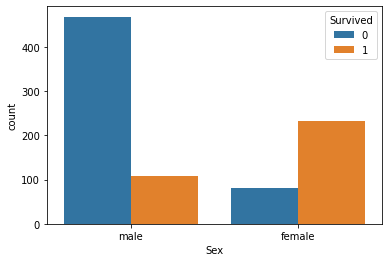

In [37]:
sns.countplot(x='Sex',hue='Survived', data=train)

In [38]:
show_missing('Sex')

Column name:  Sex
Number of values: 891
Number of missing values: 0


+ The relationship between Sex and Survived is clearly visible.
+ There are no missing values.

### 2.2.3 Ticket

In [39]:
show_missing('Ticket')

Column name:  Ticket
Number of values: 891
Number of missing values: 0


+ There no missing values.
+ Difficult to interpret.

### 2.2.4 Cabin

In [40]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [41]:
show_missing('Cabin')

Column name:  Cabin
Number of values: 204
Number of missing values: 687


+ Too many missing values

### 2.2.5 Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

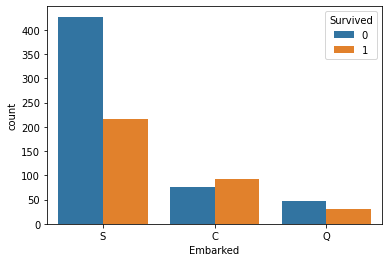

In [42]:
sns.countplot(x="Embarked", hue="Survived", data=train)

In [43]:
show_missing('Embarked')

Column name:  Embarked
Number of values: 889
Number of missing values: 2


+ Since the port of departure with the C, Survived is higher, leave this sign

# 3. Processing of missing values

In [44]:
train = pd.read_csv(r'data\train.csv')
test = pd.read_csv(r'data\test.csv')

In [45]:
y = train['Survived']
train = train.drop('Survived', axis = 1)

In [46]:
test.shape

(418, 11)

In [47]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [48]:
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3.1 Numerical features

In [49]:
# Fare
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [50]:
# Age
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [51]:
train = train.drop('PassengerId', axis = 1)
test_pass_id = test['PassengerId']
test = test.drop('PassengerId', axis = 1)

In [52]:
def family_size(size):
    if size == 0:
        return "Has_not_family"
    elif size <= 3:
        return "Has_family"
    else:
        return "Has_big_family"

In [53]:
train['SibSp&Parch'] = train['SibSp']+train['Parch']
train = train.drop('SibSp', axis = 1)
train = train.drop('Parch', axis = 1)

In [54]:
test['SibSp&Parch'] = test['SibSp']+test['Parch']
test = test.drop('SibSp', axis = 1)
test = test.drop('Parch', axis = 1)

In [55]:
train["SibSp&Parch"] = train["SibSp&Parch"].apply(family_size)
test["SibSp&Parch"] = test["SibSp&Parch"].apply(family_size)

## 3.2 Categorical features

In [56]:
cat_columns = train.select_dtypes(exclude=np.number).columns

In [57]:
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'SibSp&Parch'], dtype='object')

In [58]:
train[cat_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked,SibSp&Parch
count,891,891,891,204,889,891
unique,891,2,681,147,3,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,Has_not_family
freq,1,577,7,4,644,537


In [59]:
test[cat_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked,SibSp&Parch
count,418,418,418,91,418,418
unique,418,2,363,76,3,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S,Has_not_family
freq,1,266,5,3,270,253


In [60]:
# Del column Cabin
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin',axis = 1)

In [61]:
# Del column Name
train = train.drop('Name', axis = 1)
test = test.drop('Name',axis = 1)

In [62]:
# Del column Ticket
train = train.drop('Ticket',axis = 1)
test = test.drop('Ticket',axis = 1)

In [63]:
# Del rows where column Embarked is empty
y = y.drop(train.loc[train['Embarked'].isnull()].index, axis = 0)
train = train.drop(train.loc[train['Embarked'].isnull()].index, axis = 0)

In [64]:
# Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train["Sex"] = le.fit_transform(train[["Sex"]].values.ravel()) # ['female', 'male'] -> [0, 1]
test["Sex"] = le.transform(test[["Sex"]].values.ravel())

In [65]:
# Encoding
train = pd.get_dummies(columns=["Embarked","SibSp&Parch"], data=train, drop_first=True)
test = pd.get_dummies(columns=["Embarked","SibSp&Parch"], data=test, drop_first=True)

In [66]:
train.head()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,SibSp&Parch_Has_family,SibSp&Parch_Has_not_family
0,3,1,22.0,7.2500,0,1,1,0
1,1,0,38.0,71.2833,0,0,1,0
2,3,0,26.0,7.9250,0,1,0,1
3,1,0,35.0,53.1000,0,1,1,0
4,3,1,35.0,8.0500,0,1,0,1


In [67]:
test.head()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,SibSp&Parch_Has_family,SibSp&Parch_Has_not_family
0,3,1,34.5,7.8292,1,0,0,1
1,3,0,47.0,7.0000,0,1,1,0
2,2,1,62.0,9.6875,1,0,0,1
3,3,1,27.0,8.6625,0,1,0,1
4,3,0,22.0,12.2875,0,1,1,0


## 3.4 Visualization

In [68]:
temp_train = train.copy()
temp_train['Survived'] = y

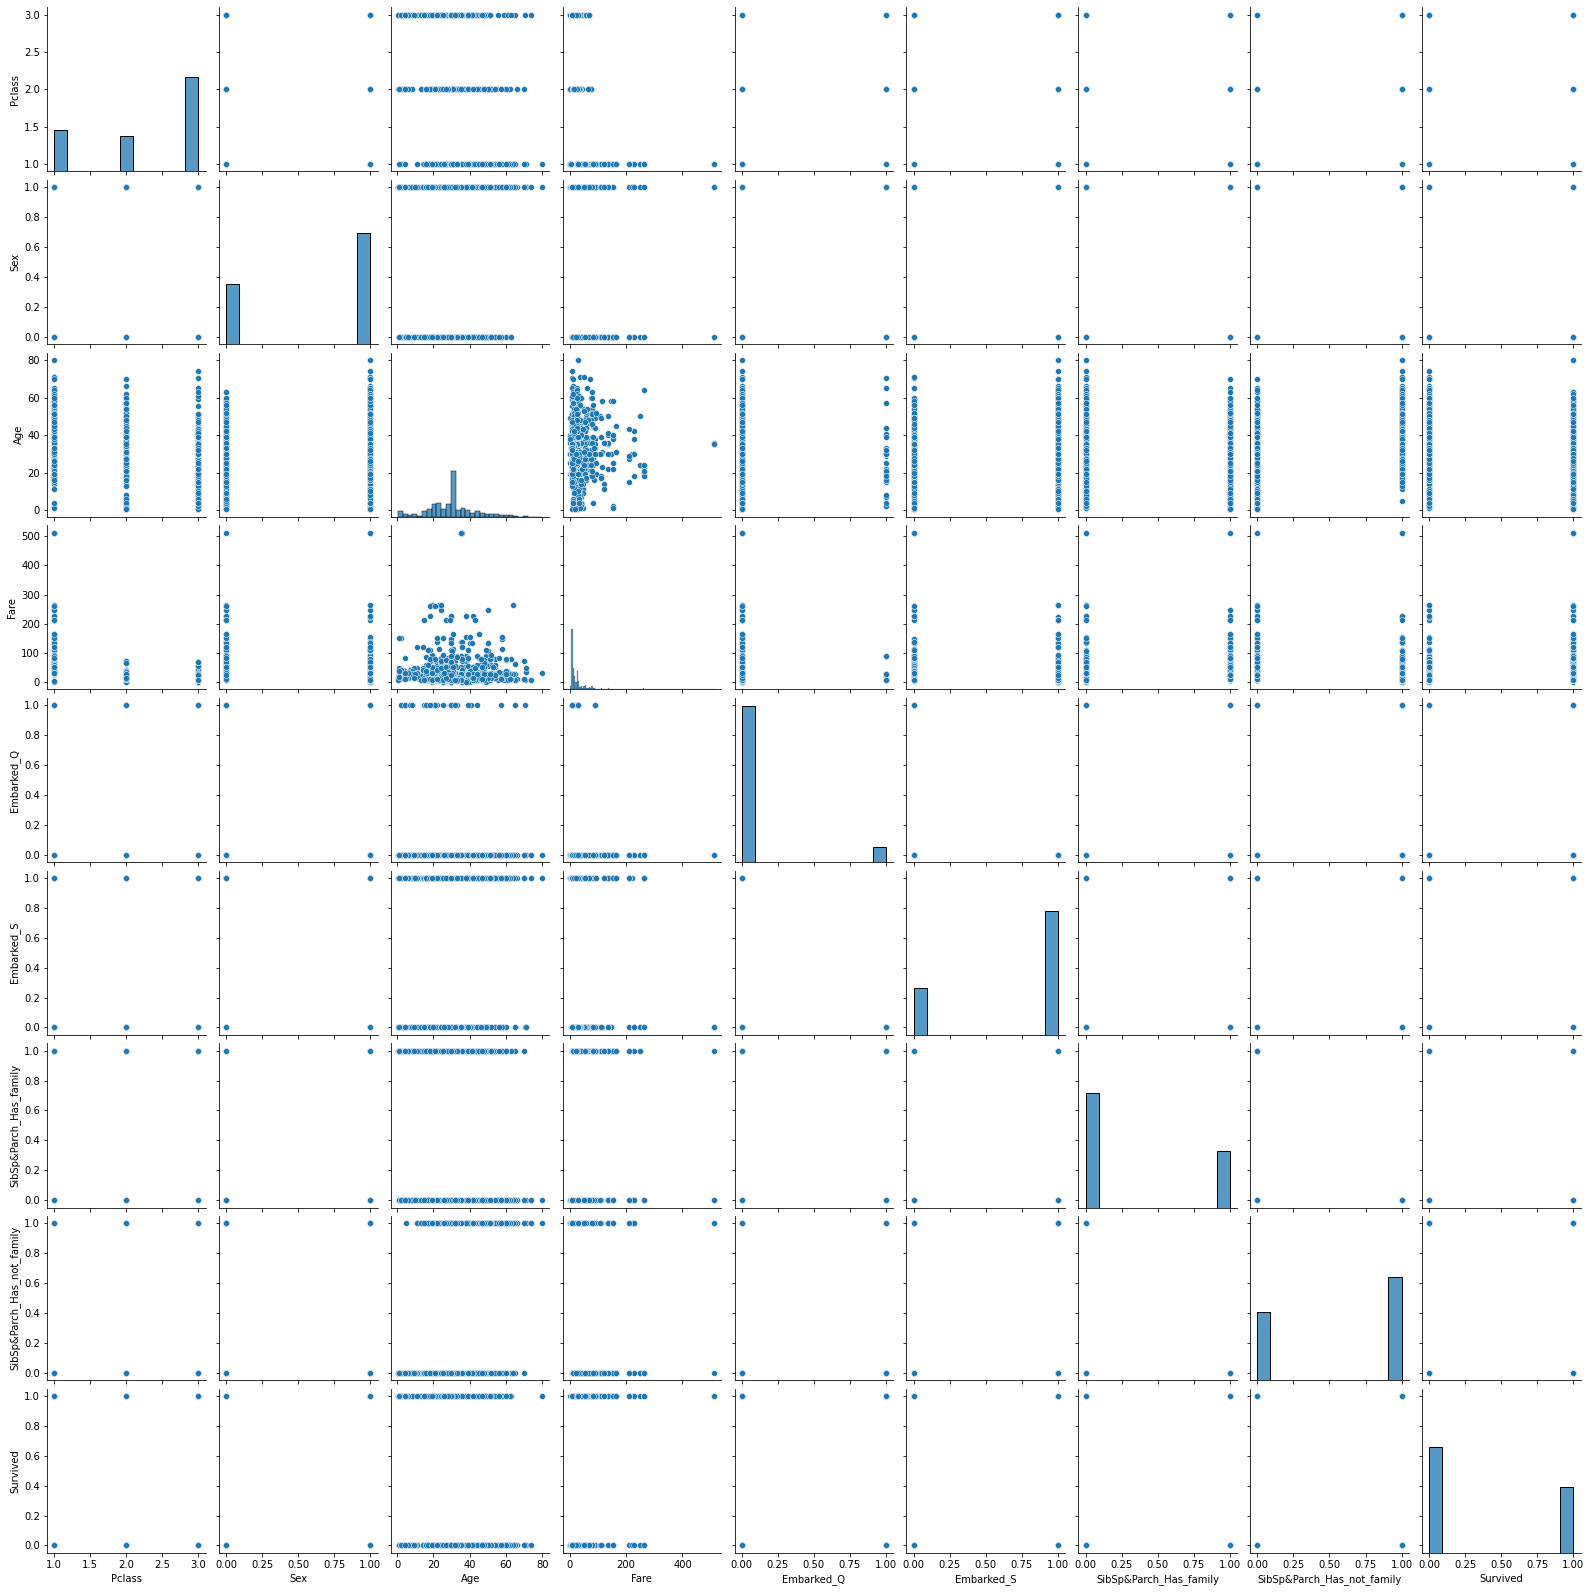

In [69]:
sns.pairplot(temp_train)

+ If look at the Survived column, it will become clear that linear models will not be effective. Because I will use a random forest

# 4. Model

## 4.1 Random forest

In [70]:
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [71]:
rf = RandomForestClassifier()

params = {'n_estimators': [300, 350, 400],
          'max_depth': [3,4,5,7,10],
          'criterion':['gini'],
          'min_samples_leaf' : [1, 3, 5],
          'max_features':['auto'],
          'min_samples_split': [5, 10, 15],
          'max_leaf_nodes':[3,5],
          }

clf = GridSearchCV(estimator=rf ,param_grid=params, cv=10, n_jobs=-1)

In [72]:
%%time
clf.fit(train, y)

Wall time: 2min 16s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 4, 5, 7, 10],
                         'max_features': ['auto'], 'max_leaf_nodes': [3, 5],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [300, 350, 400]})

In [73]:
print(clf.best_estimator_)
print(clf.best_score_)

RandomForestClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=400)
0.809920837589377


In [74]:
rf_best = clf.best_estimator_

y_pred = clf.predict(test)

In [75]:
train

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,SibSp&Parch_Has_family,SibSp&Parch_Has_not_family
0,3,1,22.000000,7.2500,0,1,1,0
1,1,0,38.000000,71.2833,0,0,1,0
2,3,0,26.000000,7.9250,0,1,0,1
3,1,0,35.000000,53.1000,0,1,1,0
4,3,1,35.000000,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,13.0000,0,1,0,1
887,1,0,19.000000,30.0000,0,1,0,1
888,3,0,29.699118,23.4500,0,1,1,0
889,1,1,26.000000,30.0000,0,0,0,1


## What are the most important signs

This can be useful when further improving the model.

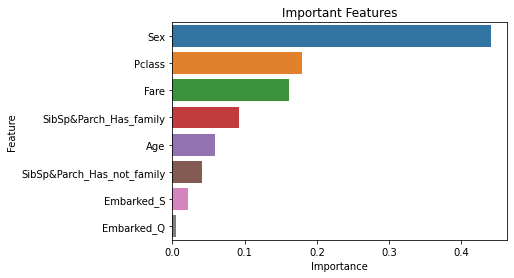

In [76]:
importance = pd.Series(rf_best.feature_importances_,index=train.columns).sort_values(ascending=False)

sns.barplot(x=importance, y=importance.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Important Features")
plt.show()

## Create the model with parametrs, get from GridSearchCV

In [77]:
rf_clf = RandomForestClassifier(max_depth=3, max_leaf_nodes=5, min_samples_split=15,
                       n_estimators=350, random_state=34)

In [78]:
rf_clf.fit(train, y)

RandomForestClassifier(max_depth=3, max_leaf_nodes=5, min_samples_split=15,
                       n_estimators=350, random_state=34)

In [79]:
ans = rf_clf.predict(test)

In [80]:
def save_ans(ans, pasanger_id, name_alg):
    submission = pd.DataFrame({'PassengerId':pasanger_id,'Survived':ans})
    submission.Survived = submission.Survived.astype(int) # не надо, наверное
    print(submission.shape) 
    filename = r'data\answers\{}.csv'.format(name_alg)
    submission.to_csv(filename,index=False)
    print('Saved file: ' + filename)

In [81]:
save_ans(ans, test_pass_id, 'random_forest')

(418, 2)
Saved file: data\answers\random_forest.csv
